In [1]:
import os
import gzip as gz
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from difflib import get_close_matches
from statsmodels.distributions.empirical_distribution import *
import scipy
from scipy.stats import norm
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /gdrive


In [2]:
#Carregando dados whosampled
!wget --no-check-certificate http://dcc.ufmg.br/~flaviovdf/whosampled_fixed_year_and_top.json.gz

--2020-05-06 17:41:06--  http://dcc.ufmg.br/~flaviovdf/whosampled_fixed_year_and_top.json.gz
Resolving dcc.ufmg.br (dcc.ufmg.br)... 150.164.0.135
Connecting to dcc.ufmg.br (dcc.ufmg.br)|150.164.0.135|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://homepages.dcc.ufmg.br/~flaviovdf/whosampled_fixed_year_and_top.json.gz [following]
--2020-05-06 17:41:06--  http://homepages.dcc.ufmg.br/~flaviovdf/whosampled_fixed_year_and_top.json.gz
Resolving homepages.dcc.ufmg.br (homepages.dcc.ufmg.br)... 150.164.0.136
Connecting to homepages.dcc.ufmg.br (homepages.dcc.ufmg.br)|150.164.0.136|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://homepages.dcc.ufmg.br/~flaviovdf/whosampled_fixed_year_and_top.json.gz [following]
--2020-05-06 17:41:07--  https://homepages.dcc.ufmg.br/~flaviovdf/whosampled_fixed_year_and_top.json.gz
Connecting to homepages.dcc.ufmg.br (homepages.dcc.ufmg.br)|150.164.0.136|:443... connected.
  Unable to loca

In [0]:
with gz.open('whosampled_fixed_year_and_top.json.gz') as who_sampled_file:
  who_sampled_json = json.load(who_sampled_file)

In [0]:
os.chdir('/gdrive/My Drive/IC_tales/code')

In [0]:
import disrupt as dr
import amutils as at

In [0]:
#Carregando dados do allmusic 
allmusic_json = at.load_am_json_data()

---

<br><h4>Construindo grafos</h4><br><p>Allmusic:</p><br>

In [106]:
Allmusic_graphs = dict()
nodes_to_consider_allmusic = list()
print('Decade  Nodes Edges')
for decade in range(1940,2020,10):
  for artist in allmusic_json:
   if set(range(1940,decade+1,10)).intersection(allmusic_json[artist]['decades']):
    nodes_to_consider_allmusic.append(artist)
  Allmusic_graphs[decade] = at.build_graph(allmusic_json, nodes_to_consider=nodes_to_consider_allmusic, decades_to_consider=range(1940,decade+1,10))
  print(decade,': ',Allmusic_graphs[decade].number_of_nodes(),' ',Allmusic_graphs[decade].number_of_edges())


Decade  Nodes Edges
1940 :  1113   2981
1950 :  2284   7726
1960 :  4336   17901
1970 :  6652   28885
1980 :  10106   44395
1990 :  17376   72661
2000 :  26603   105658
2010 :  29878   115053


<br><p>Who sampled:</p><br>

In [8]:
Whosampled_graphs = dict()
edges_to_consider_whosampled = dict()
print('Decade Nodes Edges')
for ano in range(1940, 2021, 1):
  for sample in who_sampled_json:
    for key in who_sampled_json[sample].keys():
      if who_sampled_json[sample][key]['by']!=who_sampled_json[sample][key]['other_track_by']:
        if key[:3]!='was':
          if who_sampled_json[sample][key]['track']['year']<ano+1:
            edges_to_consider_whosampled[sample] = who_sampled_json[sample] 
        else:
          if int(who_sampled_json[sample][key]['other_track']['year'])<ano+1:
            edges_to_consider_whosampled[sample] = who_sampled_json[sample]
  
  Whosampled_graphs[ano] = at.build_graph_who_sampled(who_sampled_json, edges_to_consider=edges_to_consider_whosampled)
  print(ano,':',Whosampled_graphs[ano].number_of_nodes(),' ', Whosampled_graphs[ano].number_of_edges())

Decade Nodes Edges
1940 : 55   45
1941 : 62   53
1942 : 68   59
1943 : 74   68
1944 : 78   73
1945 : 84   82
1946 : 95   94
1947 : 116   117
1948 : 124   126
1949 : 130   132
1950 : 356   370
1951 : 503   557
1952 : 657   748
1953 : 878   1017
1954 : 1073   1307
1955 : 1351   1811
1956 : 1721   2560
1957 : 2140   3546
1958 : 2596   4705
1959 : 3098   6145
1960 : 3564   7590
1961 : 4071   9168
1962 : 4647   11107
1963 : 5266   13137
1964 : 5967   15486
1965 : 6750   18155
1966 : 7673   21236
1967 : 8544   24207
1968 : 9554   27662
1969 : 10554   31184
1970 : 11428   34197
1971 : 12156   36781
1972 : 12964   39493
1973 : 13693   42053
1974 : 14408   44505
1975 : 15111   46901
1976 : 15883   49290
1977 : 16680   51677
1978 : 17511   54102
1979 : 18280   56397
1980 : 19038   58435
1981 : 19745   60463
1982 : 20592   62661
1983 : 21469   64706
1984 : 22459   67129
1985 : 23476   69660
1986 : 24635   72788
1987 : 26111   77204
1988 : 27930   84190
1989 : 29659   92285
1990 : 31768   101719
1

<br><h2>Medidas</h2><br>

In [0]:
allmusic = dict({'pagerank': dict(keys = ['df','array'])})
whosampled = dict({'pagerank': dict(keys = ['df','array'])})

<br><h4>Disruption</h4><br>

In [0]:
disruption = dict()
disruption['allmusic'] = dict(keys = range(1940,2020,10))
disruption['whosampled'] = dict(keys = range(1940,2021))
for ano in range(1940,2021):
  print(ano)
  disruption['whosampled'][ano] = dr.compute_disruption(Whosampled_graphs[ano], min_out=3)['disruption']
for decade in range(1940,2020,10):
  print(decade)
  disruption['allmusic'][decade] = dr.compute_disruption(Allmusic_graphs[decade],min_out=3)['disruption']


In [0]:
data = pd.DataFrame(disruption['allmusic'], index=disruption['allmusic'][2010].keys(), columns=range(1940,2020,10))
data.to_csv('../data/allmusic_disruption.csv')

In [0]:
data = pd.read_csv('../data/allmusic_disruption.csv')
data

In [0]:
data = pd.DataFrame(disruption['whosampled'], index=disruption['whosampled'][2020].keys(), columns=range(1940,2021))
data.to_csv('../data/whosampled_disruption_per_year.csv')

In [0]:
data = pd.read_csv('../data/whosampled_disruption_per_year.csv')
data

In [0]:
for column in data.columns[1:]:
  if len(data[column].dropna()) == Whosampled_graphs[int(column)].number_of_nodes() :
    print(column)

<br><h4>Pagerank</h4><br>

In [119]:
pageranks = dict()
pageranks['allmusic'] = dict(keys = range(1940,2020,10))
pageranks['whosampled'] = dict(keys = range(1940,2021,1))
#for decade in range(1940,2020,10):
#  pageranks['allmusic'][decade] = nx.pagerank(Allmusic_graphs[decade])
for ano in range(1940,2021,1):
  print(ano)
  pageranks['whosampled'][ano] = nx.pagerank(Whosampled_graphs[ano])

1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [0]:
pageranks['whosampled']
data = pd.DataFrame(pageranks['whosampled'], index=pageranks['whosampled'][2020].keys(), columns=range(1940,2021,1))
data.to_csv('../data/whosampled_pageranks_per_year.csv')

In [122]:
data = pd.read_csv('../data/whosampled_pageranks_per_year.csv')
data

,Unnamed: 0,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Boban Markovic,0.010923,0.009569,0.008714,0.0080,0.007431,0.006882,0.006041,0.004820,0.004531,0.004314,0.001615,0.001123,0.000867,0.000656,0.000516,0.000405,0.000308,0.000239,0.000194,0.000158,0.000135,0.000118,0.000100,0.000085,0.000073,0.000063,0.000054,0.000048,0.000042,0.000037,0.000033,0.000031,0.000029,0.000027,0.000026,0.000024,0.000023,0.000022,0.000021,...,0.000018,0.000017,0.000016,0.000016,0.000015,0.000014,0.000013,0.000012,0.000011,0.000010,0.000010,0.000009,0.000008,0.000007,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
1,Milivoje Mića Marković,0.020207,0.017703,0.016122,0.0148,0.013748,0.012732,0.011176,0.008917,0.008383,0.007981,0.002988,0.002077,0.001605,0.001215,0.000954,0.000749,0.000571,0.000442,0.000359,0.000292,0.000251,0.000219,0.000186,0.000157,0.000136,0.000117,0.000100,0.000088,0.000077,0.000068,0.000062,0.000058,0.000054,0.000050,0.000048,0.000045,0.000047,0.000044,0.000042,...,0.000036,0.000035,0.000033,0.000031,0.000030,0.000028,0.000026,0.000024,0.000023,0.000021,0.000019,0.000018,0.000016,0.000015,0.000015,0.000014,0.000013,0.000012,0.000012,0.000011,0.000010,0.000010,0.000009,0.000009,0.000008,0.000008,0.000007,0.000007,0.000007,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004
2,Berkant,0.010923,0.009569,0.008714,0.0080,0.007431,0.006882,0.006041,0.004820,0.004531,0.004314,0.001615,0.001123,0.000867,0.000656,0.000516,0.000405,0.000308,0.000239,0.000194,0.000158,0.000135,0.000118,0.000100,0.000085,0.000073,0.000063,0.000054,0.000048,0.000042,0.000110,0.000126,0.000139,0.000126,0.000129,0.000121,0.000118,0.000112,0.000104,0.000098,...,0.000094,0.000091,0.000085,0.000081,0.000077,0.000073,0.000069,0.000064,0.000060,0.000055,0.000051,0.000047,0.000044,0.000040,0.000037,0.000035,0.000031,0.000030,0.000028,0.000027,0.000025,0.000024,0.000023,0.000022,0.000021,0.000021,0.000020,0.000019,0.000018,0.000017,0.000017,0.000016,0.000015,0.000015,0.000015,0.000014,0.000014,0.000014,0.000013,0.000013
3,Hugues Aufray,0.029492,0.025838,0.023530,0.0216,0.020064,0.018581,0.016311,0.013015,0.012234,0.011648,0.004361,0.003032,0.002342,0.001773,0.001393,0.001093,0.000833,0.000645,0.000523,0.000426,0.000366,0.000319,0.000271,0.000230,0.000198,0.000170,0.000192,0.000183,0.000184,0.000250,0.000249,0.000240,0.000169,0.000176,0.000163,0.000159,0.000153,0.000147,0.000143,...,0.000131,0.000126,0.000134,0.000129,0.000118,0.000112,0.000105,0.000097,0.000091,0.000082,0.000077,0.000071,0.000066,0.000060,0.000055,0.000052,0.000049,0.000048,0.000046,0.000043,0.000044,0.000042,0.000040,0.000039,0.000037,0.000036,0.000035,0.000034,0.000035,0.000034,0.000032,0.000030,0.000029,0.000032,0.000031,0.000030,0.000028,0.000027,0.000027,0.000027
4,Vasfi Uçaroğlu Orkestrası,0.010923,0.009569,0.008714,0.0080,0.007431,0.006882,0.006041,0.004820,0.004531,0.004314,0.001615,0.001123,0.000867,0.000656,0.000516,0.000405,0.000308,0.000239,0.000194,0.000158,0.000135,0.000118,0.000100,0.000085,0.000073,0.000063,0.000054,0.000048,0.000042,0.000037,0.000033,0.000031,0.000029,0.000027,0.000026,0.000024,0.000023,0.000022,0.000021,...,0.000018,0.000017,0.000016,0.000016,0.000015,0.000014,0.000013,0.000012,0.000011,0.000010,0.000010,0.000009,0.000008,0.000007,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,

In [0]:
#allmusic['pagerank']['df'] = pd.DataFrame(pageranks['allmusic'], index=pageranks['allmusic'][2010].keys(), columns=range(1940,2020,10)).T
#allmusic['pagerank']['array'] = allmusic['pagerank']['df'].to_numpy()
whosampled['pagerank']['df'] = pd.DataFrame(pageranks['whosampled'], index=pageranks['whosampled'][2019].keys(), columns=range(1940,2020))
#whosampled['pagerank']['array'] = whosampled['pagerank']['df'].to_numpy()

<br><h4>Katz</h4><br>Muito lento :( <br>

In [0]:
# katz_centrality = dict()
# katz_centrality['allmusic'] = dict(keys = range(1940,2020,10))
# katz_centrality['whosampled'] = dict(keys = range(1940,2020,10))
# for decade in range(1940,2020,10):
#  print(decade)
#  print('allmusic')
#  katz_centrality['allmusic'][decade] = nx.katz_centrality(Allmusic_graphs[decade], max_iter=1000000)
#  print('whosampled')
#  katz_centrality['whosampled'][decade] = nx.katz_centrality(Whosampled_graphs[decade],max_iter=1000000)

In [0]:
# allmusic =  dict({'katz_centrality': dict(keys = ['df','array'])})
# whosampled = dict({'katz_centrality': dict(keys = ['df','array'])})
# allmusic['katz_centrality']['df'] = pd.DataFrame(katz_centrality['allmusic'], index=range(1940,2020,10) , columns=katz_centrality['allmusic'][2010].keys())
# allmusic['katz_centrality']['array'] = allmusic['katz_centrality']['df'].to_numpy()
# whosampled['katz_centrality']['df'] = pd.DataFrame(katz_centrality['whosampled'], index=range(1940,2020,10) , columns=katz_centrality['whosampled'][2010].keys())
# whosampled['katz_centrality']['array'] = whosampled['katz_centrality']['df'].to_numpy()

<br><h4>In degree</h4><br>

In [0]:
in_degree = dict()
in_degree['allmusic'] = dict(keys = range(1940,2020,10))
in_degree['whosampled'] = dict(keys = range(1940,2020,1))
#for decade in range(1940,2020,10):
#  in_degree['allmusic'][decade] = dict(Allmusic_graphs[decade].in_degree(weight = 'weight'))
for decade in range(1940,2021,1):
  in_degree['whosampled'][decade] = dict(Whosampled_graphs[decade].in_degree(weight = 'weight'))

In [0]:
#allmusic['in_degree'] = dict(keys = ['df','array'])
whosampled['in_degree'] =  dict(keys = ['df','array'])
#allmusic['in_degree']['df'] = pd.DataFrame(in_degree['allmusic'], index=in_degree['allmusic'][2010].keys(), columns=range(1940,2020,10)).T
#allmusic['in_degree']['array'] = allmusic['in_degree']['df'].to_numpy()
whosampled['in_degree']['df'] = pd.DataFrame(in_degree['whosampled'], index=in_degree['whosampled'][2020].keys(), columns=range(1940,2021,1)).T
whosampled['in_degree']['array'] = whosampled['in_degree']['df'].to_numpy()

In [0]:
whosampled['in_degree']['df'].T.to_csv('../data/whosampled_in_degree_per_year.csv')

In [116]:
len(pd.read_csv('../data/whosampled_in_degree_per_year.csv').index)

166078

<br><br><h2>Surpresa</h2><br><br>

In [0]:
whosampled = dict({'pagerank': dict(keys = ['df','array'])})
whosampled['pagerank']['df'] = pd.read_csv('../save/whosampled_pagerank_year.csv')
whosampled['pagerank']['df'] = whosampled['pagerank']['df'].drop(columns=['Unnamed: 0'])
whosampled['pagerank']['df'].index = range(1940,2020)
whosampled['pagerank']['array'] = whosampled['pagerank']['df'].to_numpy()

In [0]:
def pr_to_rank_in_pr(data):
  transformed = dict()
  for ano in range(len(data.axes[0])):
    print(ano)
    pagerank = data.iloc[ano][at.non_zero_valid_indices(data.iloc[ano])]
    menor = pagerank.min()
    pagerank = pagerank[pagerank!=menor]
    log_pagerank = np.log(pagerank)
    pagerank_zscore = (log_pagerank - log_pagerank.mean())/log_pagerank.std()

    transformed[ano]= pagerank_zscore
  return transformed

<br><h3>hipoteses</h3><br>

In [0]:
def hipotese_1(data, ano): 
  I = at.non_zero_valid_indices(data[ano-2,:])
  #print(len(data[ano-1,I]) - len(valid_indices(data[ano-1][data[ano-1].nonzero()])))
  taxa = np.mean(data[ano,I] / data[ano-1,I])
  return taxa*data[ano-1, I]

def hipotese_2(data, ano):
  I = dict()
  medias = np.ones(data[ano,at.non_zero_valid_indices(data[ano-2,:])].shape)
  
  for artista in at.non_zero_valid_indices(data[ano-2,:]):
    I =  at.non_zero_valid_indices(data[:ano, artista])
    medias[artista] =(data[I[1:],artista] / data[I[:-1],artista]).mean()
    
  
  return medias* data[ano-1, at.non_zero_valid_indices(data[ano-2,:])]

def hipotese_2_1(data, ano):
  I = dict()
  medias = np.ones(at.non_zero_valid_indices(data[ano-2,:]).shape)
  
  for artista in at.non_zero_valid_indices(data[ano-2,:]):
    I =  at.non_zero_valid_indices(data[ano-10:ano, artista]) + ano - 10
    medias[artista] =(data[I[1:],artista] / data[I[:-1],artista]).mean()

    # if np.isnan(medias).any() or np.isinf(medias).any():
    #   print(data[I[1:],artista] ,"/", data[I[:-1],artista])


  return medias* data[ano-1, at.non_zero_valid_indices(data[ano-2,:])]


def hipotese_3(data, ano):
  I = dict()
  medias = np.ones(data[ano,:].shape)
  
  #for valid_artist_years, artista in zip(I, range(len(I))):
  for artista in at.non_zero_valid_indices(data[ano-1,:]):
    I[artista] =  at.non_zero_valid_indices(data[:, artista])

    medias[artista] =(data[I[artista][1:],artista] / data[I[artista][:-1],artista]).mean()
  
  return (medias*data[ano-1,:])[at.non_zero_valid_indices(data[ano-1,:])]


In [0]:
def surprise(pMs, data, hipoteses, years_range = None):
  if years_range == None:
    years_range = range(data.shape[0])

  
  # Initiating some variebles:
  # Models distribution
  pMs = np.array(pMs) 
  # Surprise model
  surpriseData = np.zeros(data.shape)
  # pMs list
  lista_pM = [pMs]
  # pDMs - probability of data given the models
  pDMs = np.zeros(pMs.shape)
  # pMDs - probability of models given the data
  pMDs = np.zeros(pMs.shape)

  diferencas = np.zeros(pMs.shape)
  soma_das_diferencas = np.zeros(pMs.shape)


  for ano in years_range:
    #Valid artist indices are indices that are neither 0 nor Nan
    valid_artist_indices = at.non_zero_valid_indices(data[ano-2,:])

    # difference between prior and posterior 
    soma_das_diferencas = np.zeros(pMs.shape)

    # models x artist
    matriz_diferencas = np.zeros((len(pMs),len(valid_artist_indices)))
    
    # Estimating the pMD
    for i in range(len(hipoteses)):
      matriz_diferencas[i] = data[ano, :][valid_artist_indices] - at.normalize(hipoteses[i](data, ano)[:len(valid_artist_indices)])


    #Para cada artista valido
    for artista in range(len(valid_artist_indices)):
      #Para cada crença
      for i in range(len(diferencas)):
        diferencas[i] = matriz_diferencas[i,artista]  
        pDMs[i] = 1 - np.abs(diferencas[i])

      pMDs = pMs*pDMs


    #At this point we already have pMDs and pMs, lets calculate their divergence
      
      kl = 0
      voteSum = 0
      for j in range(len(pMDs)):
        kl = kl + pMDs[j] * np.log( pMDs[j] / pMs[j])
        voteSum = voteSum + diferencas[j] * pMs[j]
        soma_das_diferencas[j] = soma_das_diferencas[j] + np.abs(diferencas[j])


      if voteSum >= 0 :
        surpriseData[ano, artista] = np.abs(kl) 
      else:
        surpriseData[ano, artista] = -1*np.abs(kl)
      
    #Now lets globally update our model belief.
    
    for j in range(len(pMs)):
      pDMs[j] = 1 - (0.5 * soma_das_diferencas[j])
      pMDs[j] = pMs[j] * pDMs[j]
      pMs[j] = pMDs[j]

    # Normalizing the  beliefs
    pMs = at.normalize(pMs)

    if ano%10==0:
      print(pMs)

    lista_pM.append(pMs)
  return surpriseData, lista_pM

In [10]:
whosampled['pagerank']['surprise'], whosampled['pagerank']['pM list'] = surprise([1/2,1/2], whosampled['pagerank']['array'], [hipotese_1,hipotese_2_1], years_range = range(whosampled['pagerank']['array'].shape[0])[10:])
whosampled['pagerank']['surprise'] = pd.DataFrame(whosampled['pagerank']['surprise'], index = whosampled['pagerank']['df'].index, columns=whosampled['pagerank']['df'].columns)

[0.500148 0.499852]
[0.51844642 0.48155358]
[0.54607556 0.45392444]
[0.60291506 0.39708494]
[0.6061174 0.3938826]
[0.60707832 0.39292168]
[0.61136075 0.38863925]


In [0]:
def surprises_greater_then(data, above_limit=0, bellow_limit=0, range_ano = None):
  if range_ano== None:
    range_ano = data['surprise'].index
    print(range_ano)
  surprise = dict()
  for ano in range_ano:
    for artista in data['surprise'].columns:
      if data['surprise'][artista][ano]>above_limit or data['surprise'][artista][ano]<bellow_limit:
        surprise[artista] = [ano,data['surprise'][artista][ano]]
  print('Ordenando')
  return pd.DataFrame(surprise.values(),columns=['ano', 'surprise'], index=surprise.keys()).sort_values(by='surprise', ascending=False)

In [34]:
surprises_artist_index = surprises_greater_then(whosampled['pagerank'])

RangeIndex(start=1940, stop=2020, step=1)
Ordenando


,ano,surprise
Traditional Folk,2019,0.000409
James Brown,2019,0.000206
Teddy Pendergrass,2019,0.000137
Black Box,2019,0.000131
Elizabeth Cotten,2019,0.000125


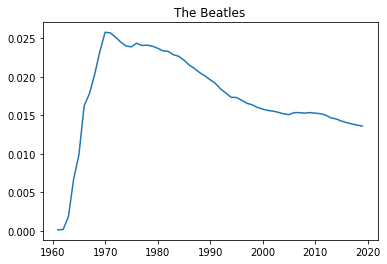

In [21]:
data = np.array(whosampled['pagerank']['df']['The Beatles'])
plt.title('The Beatles')
plt.plot(range(1940,2020), data)
plt.show()

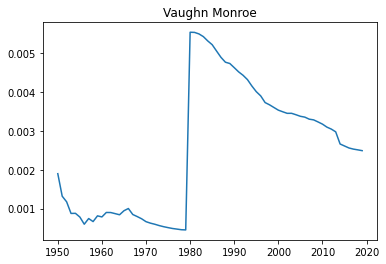

In [269]:
data = np.array(whosampled['pagerank']['df']['Vaughn Monroe'])
plt.title('Vaughn Monroe')
plt.plot(range(1940,2020), data)
plt.show()

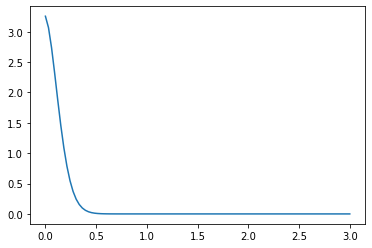

In [0]:
normal = scipy.stats.lognorm.pdf
x = np.linspace(0.001, 3, 100)
plt.plot(x, normal(x, loc = data.mean()-1, s = data.std()*50))

In [128]:
print(len(pd.read_csv('../data/allmusic_pageranks.csv').index))

29878


166078


In [0]:
allmusic 29877 pagerank tem mais
whosampled 109794 pagerank tem menos